<a href="https://colab.research.google.com/github/o-bissing/blood_cell_segmentation/blob/main/Image_segmentation5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("/content/002f20ad-2ace-499c-9335-c9080bc3e6b5.png")

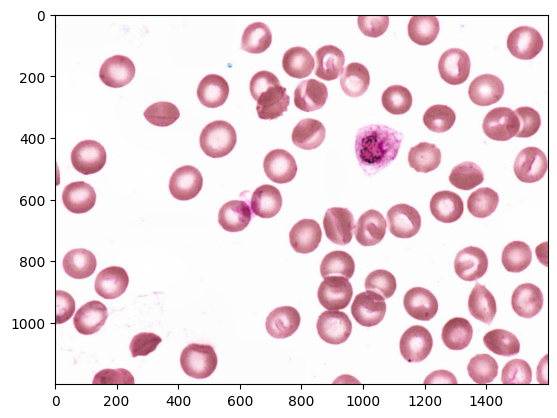

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
# Threshhold + Otsu algorithm
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

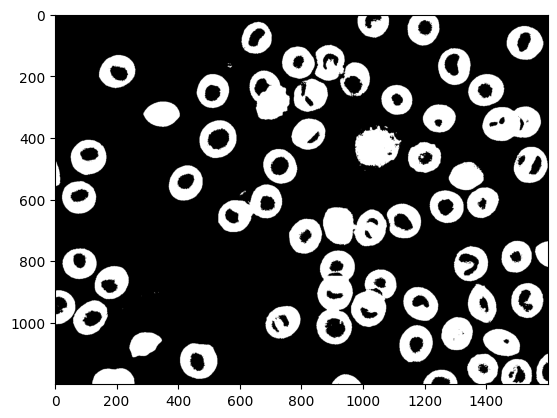

In [7]:
plt.imshow(thresh, cmap='gray')

In [8]:
# Noise removal
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [9]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

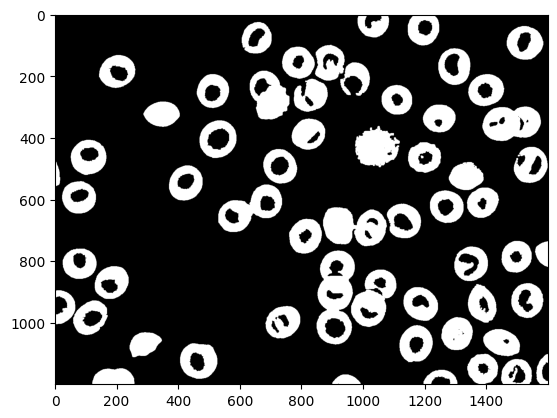

In [10]:
plt.imshow(opening,cmap='gray')

In [11]:
# Filling the holes
test = opening.copy()

In [12]:
th,im_th = cv2.threshold(test,220,255,cv2.THRESH_BINARY_INV)
im_floodfill = im_th.copy()
h,w = im_th.shape[:2]

In [13]:
mask = np.zeros((h+2,w+2), np.uint8)
cv2.floodFill(test,mask,(0,0),255)
im_floodfill_inv = cv2.bitwise_not(test)
im_out = im_floodfill_inv + opening.copy()

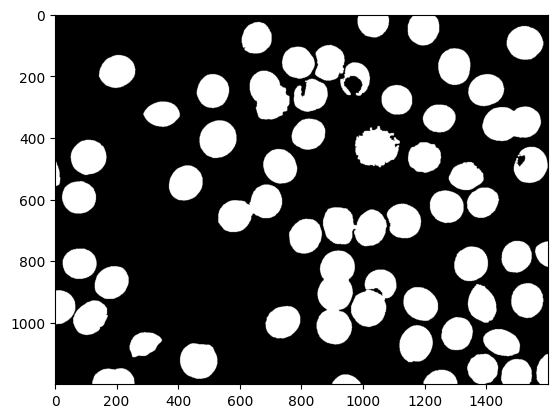

In [14]:
plt.imshow(im_out,cmap='gray')

In [51]:
# Distance transformation
dist_transform_1 = cv2.distanceTransform(im_out,cv2.DIST_L2,5)
dist_transform_2 = cv2.distanceTransform(im_out,cv2.DIST_LABEL_PIXEL,5)
dist_transform_3 = cv2.distanceTransform(im_out,cv2.DIST_L1,5)
dist_transform_4 = cv2.distanceTransform(im_out,cv2.DIST_MASK_3,5)
dist_transform_5 = cv2.distanceTransform(im_out,cv2.DIST_LABEL_CCOMP,0)
dist_transform_6 = cv2.distanceTransform(im_out,cv2.DIST_C,5)

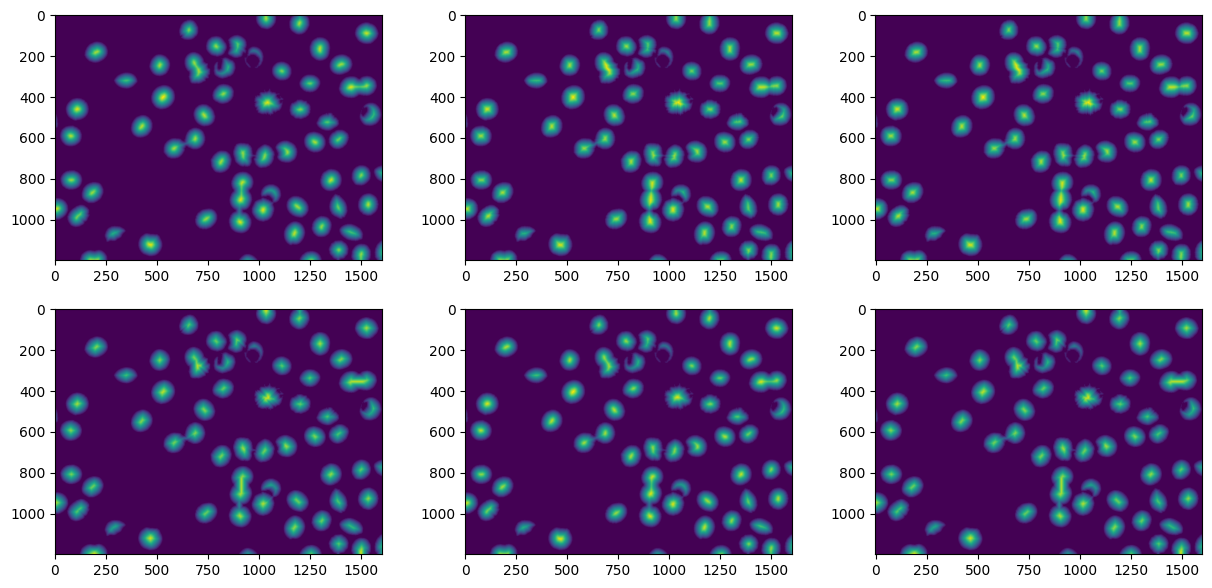

In [59]:
image_datas = [dist_transform_1,dist_transform_2,dist_transform_3,dist_transform_4,dist_transform_5,dist_transform_6]
f, axarr = plt.subplots(2,3,figsize=(15, 7))
axarr[0,0].imshow(image_datas[0])
axarr[0,1].imshow(image_datas[1])
axarr[0,2].imshow(image_datas[2])
axarr[1,0].imshow(image_datas[3])
axarr[1,1].imshow(image_datas[4])
axarr[1,2].imshow(image_datas[5])

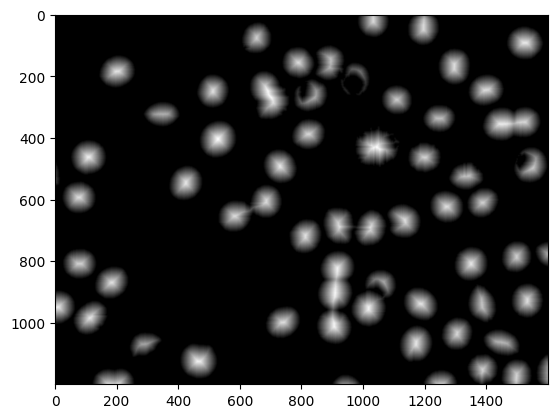

In [60]:
plt.imshow(dist_transform_2,cmap='gray')

In [61]:
ret, sure_fg = cv2.threshold(dist_transform_2,0.5*dist_transform_2.max(),255,0)

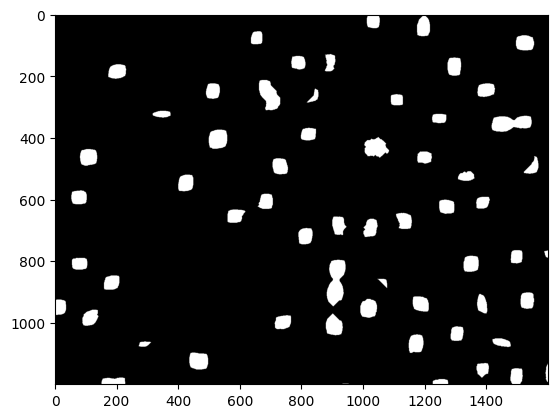

In [62]:
plt.imshow(sure_fg,cmap='gray')

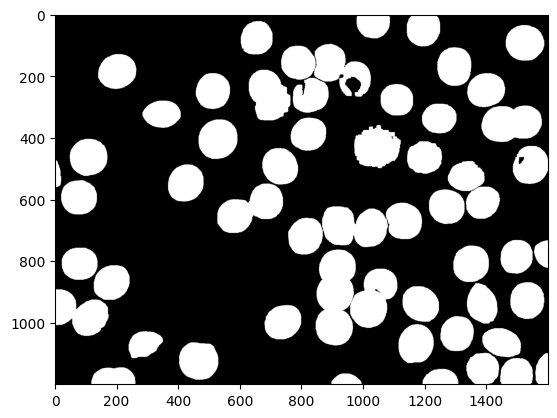

In [63]:
sure_bg = cv2.dilate(im_out,kernel,iterations=3)
plt.imshow(sure_bg,cmap='gray')

In [64]:
sure_fg = np.uint8(sure_fg) # casting as an integer

In [65]:
unknown = cv2.subtract(sure_bg,sure_fg)

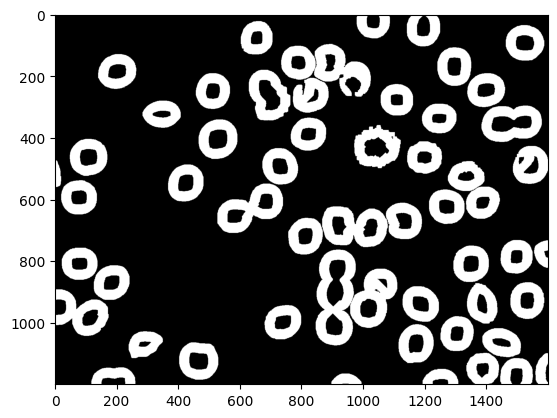

In [67]:
plt.imshow(unknown,cmap='gray')

In [68]:
ret,markers = cv2.connectedComponents(sure_fg)

In [69]:
markers = markers + 1

In [70]:
markers[unknown==255] = 0

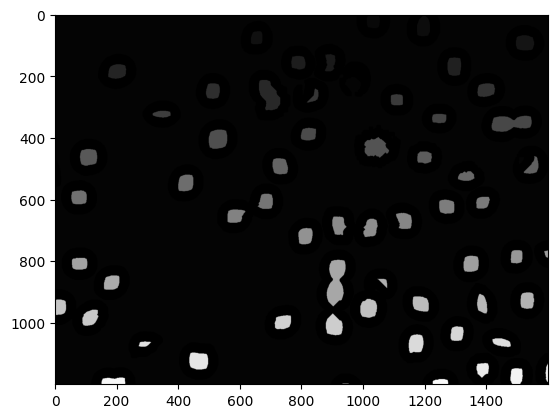

In [72]:
plt.imshow(markers,cmap='gray')

In [73]:
markers = cv2.watershed(img,markers)

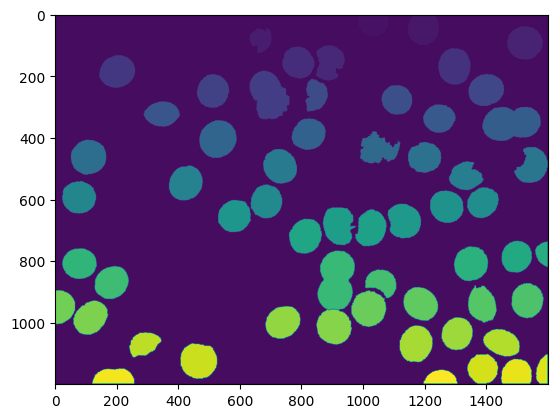

In [81]:
plt.imshow(markers)

In [75]:
contours,hierarichy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
  if hierarichy[0][i][3] == -1:
    cv2.drawContours(img,contours,i,(255,0,0),10)

Objects number is: 60


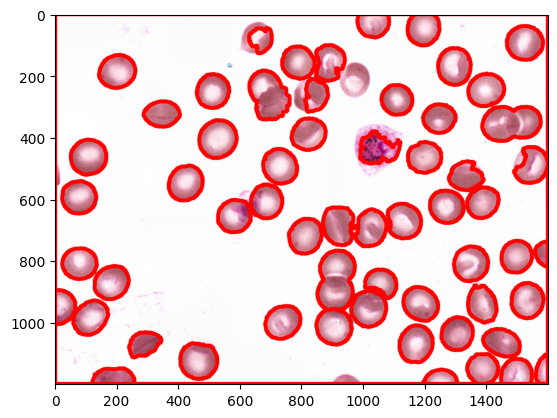

In [76]:
plt.imshow(img,cmap='gray')
print('Objects number is:', ret-1)

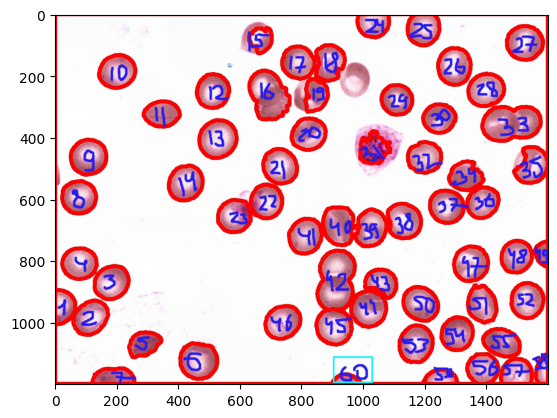

In [77]:
img3 = cv2.imread("/content/total_counted.jpg")
plt.imshow(img3,cmap='gray')

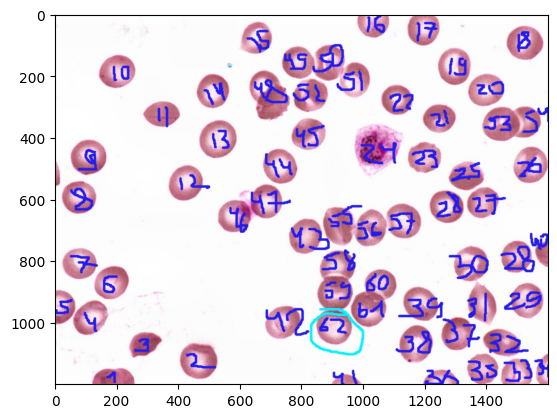

In [78]:
img2 = cv2.imread("/content/total.jpg")
plt.imshow(img2,cmap='gray')

**Update.** Algorithm was able to find 60 out of aprx. 62 cells, which is quite good for me, and finally I got the count correct.